In [1]:
import pandas as pd

df = pd.read_csv('data/spotify_millsongdata.csv')
df.head()
df.info()
data = df.text.to_list()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [2]:
import nltk
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# nltk.download('wordnet')
# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

In [3]:
cleaned_data = []
for sentence in data:
    cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stopwords]))

In [4]:
from nltk.stem import LancasterStemmer
stem = LancasterStemmer()

In [5]:
stemmed_data = []
for sentence in cleaned_data:
    stemmed_data.append(''.join([stem.stem(word=word) for word in sentence]))

In [6]:
stemmed_data[0]

cleanex = pd.DataFrame(cleaned_data)
cleanex.to_csv('cleaned.csv')
stemex = pd.DataFrame(stemmed_data)
stemex.to_csv('stemmed.csv')

In [7]:
lemmatizer = WordNetLemmatizer()
lemma_data = []
for sentence in cleaned_data:
    lemma_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))

In [8]:
lemma_data[0]
lemmax = pd.DataFrame(lemma_data)
lemmax.to_csv('lemma_data.csv')

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectorizer = CountVectorizer()

In [10]:
import numpy as np
bag = vectorizer.fit_transform(np.array(stemmed_data))
count_array = list(bag)
count_array[40].shape


(1, 82382)

In [11]:
count_array[0].toarray()[count_array[0].toarray() == 1]
count_array[0].toarray()



array([[0, 0, 0, ..., 0, 0, 0]])

In [12]:
from sklearn.decomposition import PCA,SparsePCA,TruncatedSVD
from sklearn.preprocessing import StandardScaler
pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)
scaler = StandardScaler(with_mean=True, with_std=True,)
# sd = pca.fit_transform(scaler.fit_transform(count_array[0].toarray()))
sample_len = 1001
sample = np.array([count_array[i].toarray() for i in range(sample_len)]).reshape((sample_len,-1))

In [13]:
sample


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
scaled_sample = scaler.fit_transform(sample)
pca_sample = pca.fit_transform(scaled_sample)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


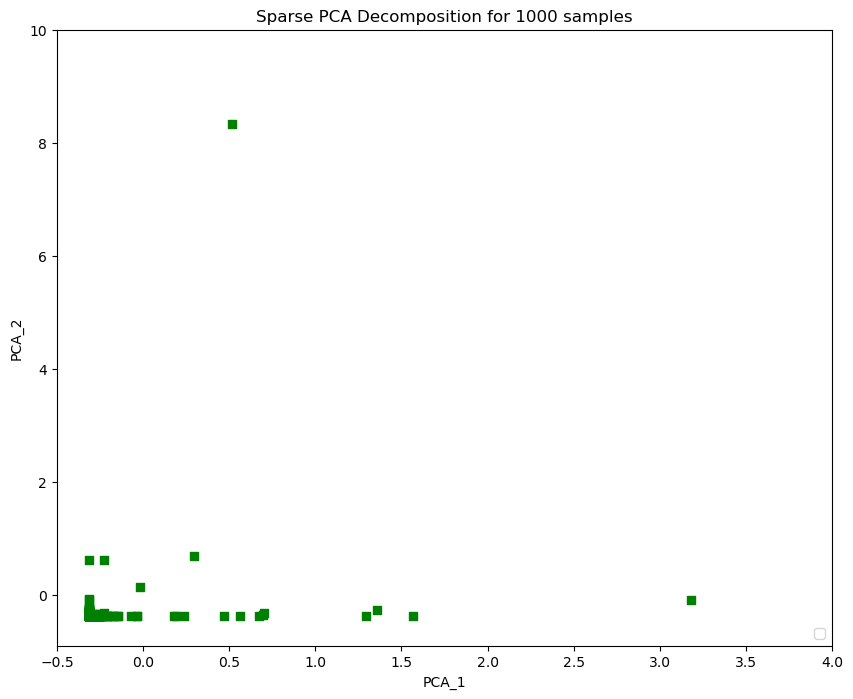

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
plt.scatter(pca_sample[:,0],pca_sample[:,1],color='green',marker='s')
plt.xlim([-0.5,4])
plt.ylim([-0.9,10])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(loc='lower right')

In [1]:
from nltk.corpus import stopwords
def preprocess_text(df,stem=True):
    data = df.text.to_list()
    stop_words = set(stopwords.words('english'))
    cleaned_data = []
    for sentence in data:
        cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stop_words]))
    if stem:
        stem = LancasterStemmer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(''.join([stem.stem(word=word) for word in sentence]))
    else:
        lemmatizer = WordNetLemmatizer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))
    vectorizer = CountVectorizer()
    bag = vectorizer.fit_transform(np.array(processed_data))
    count_array = list(bag)
    pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)
    scaler = StandardScaler(with_mean=True, with_std=True,)
    
    start = 1000
    sample = np.array([count_array[i].toarray() for i in range(start)]).reshape((start,-1))
    scaled_sample = scaler.fit_transform(sample)
    df = pca.fit_transform(scaled_sample)
    sample_len = 2000
    while sample_len < len(processed_data):
        print(f'Iterating through text {start} - {sample_len} of the data....')
        sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((1000,-1))
        scaled_sample = scaler.fit_transform(sample)
        pca_sample = pca.fit_transform(scaled_sample)
        df = np.vstack((df,pca_sample))
        start += 1000
        sample_len += 1000
        
    print(f'Iterating through the last text of the data....')
    sample_len = len(processed_data)
    shape = sample_len-start
    sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((shape,-1))
    scaled_sample = scaler.fit_transform(sample)
    pca_sample = pca.fit_transform(scaled_sample)
    df = np.vstack((df,pca_sample))
    
    return df
    

In [17]:
df = preprocess_text(df,stem=True)
dfx = pd.DataFrame(df)
dfx.to_csv('dfx.csv')

Iterating through text 1000 - 2000 of the data....
Iterating through text 2000 - 3000 of the data....
Iterating through text 3000 - 4000 of the data....
Iterating through text 4000 - 5000 of the data....
Iterating through text 5000 - 6000 of the data....
Iterating through text 6000 - 7000 of the data....
Iterating through text 7000 - 8000 of the data....
Iterating through text 8000 - 9000 of the data....
Iterating through text 9000 - 10000 of the data....
Iterating through text 10000 - 11000 of the data....
Iterating through text 11000 - 12000 of the data....
Iterating through text 12000 - 13000 of the data....
Iterating through text 13000 - 14000 of the data....
Iterating through text 14000 - 15000 of the data....
Iterating through text 15000 - 16000 of the data....
Iterating through text 16000 - 17000 of the data....
Iterating through text 17000 - 18000 of the data....
Iterating through text 18000 - 19000 of the data....
Iterating through text 19000 - 20000 of the data....
Iterating 

In [18]:
len(cleaned_data)


57650

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


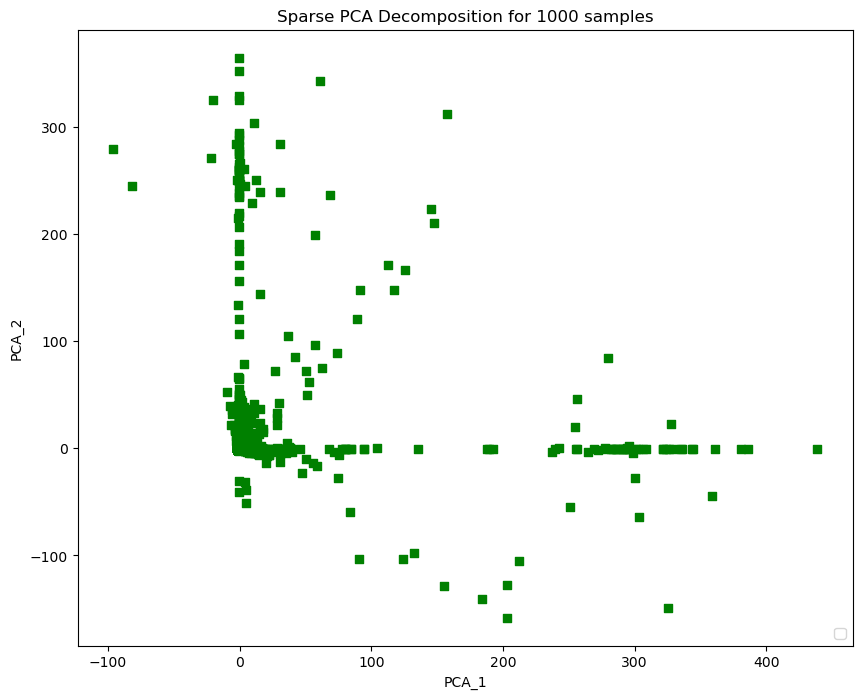

In [19]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[:,0],df[:,1],color='green',marker='s')
# plt.xlim([-2,4])
# plt.ylim([-2,10])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(loc='lower right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


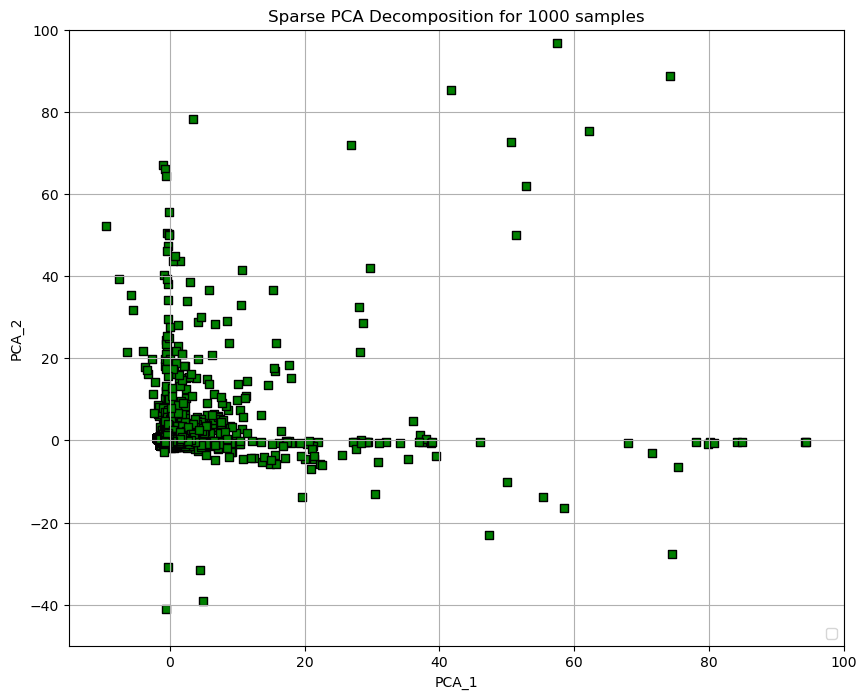

In [20]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[:,0],df[:,1],color='green',marker='s',edgecolor='black')
plt.xlim([-15,100])
plt.ylim([-50,100])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.grid()
plt.legend(loc='lower right')

In [21]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial.distance import pdist

In [22]:
km = KMeans(n_clusters=10,init='random',n_init=100,max_iter=300,tol=0.0001)
y_km = km.fit_predict(df)
np.unique(y_km)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [23]:
km.cluster_centers_


array([[  -1.21468632,  263.66448965],
       [ 103.34161518,   -5.74850338],
       [   0.83447044,    1.5842593 ],
       [ 163.10505441, -120.56500355],
       [ 301.67648465,   -3.85335774],
       [  27.07905055,   -2.7581637 ],
       [  -0.41982321,   -0.37467808],
       [   3.52551981,   28.77120238],
       [  31.69572199,  105.57233913],
       [ 113.55634176,  201.61746191]])

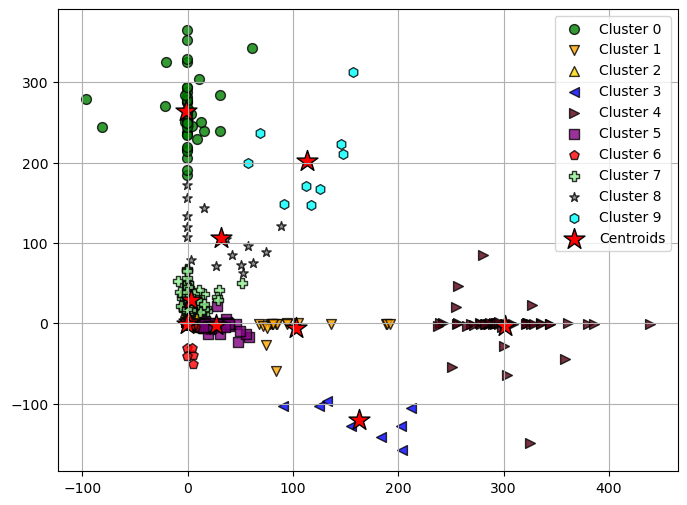

In [24]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange","gold", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

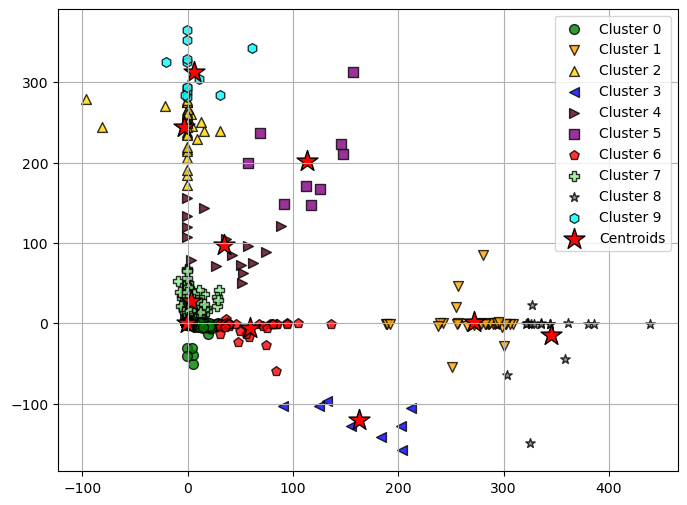

In [25]:
km_plus = KMeans(n_clusters=10,init='k-means++',n_init=100,max_iter=300,tol=0.0001) ## This is achieved by changing the init parameter to k-means++
y_km = km_plus.fit_predict(df)
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange","gold", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km_plus.cluster_centers_[:,0],km_plus.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

In [26]:
#Elbow Method

km_distortion = []
km_plus_distortion = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=50,init='random',
                max_iter=300,tol=0.0001)
    km_plus = KMeans(n_clusters=i,n_init=50,init='k-means++',
                max_iter=300,tol=0.0001)
    km.fit(df)
    km_plus.fit(df)
    km_distortion.append(km.inertia_)
    km_plus_distortion.append(km_plus.inertia_)

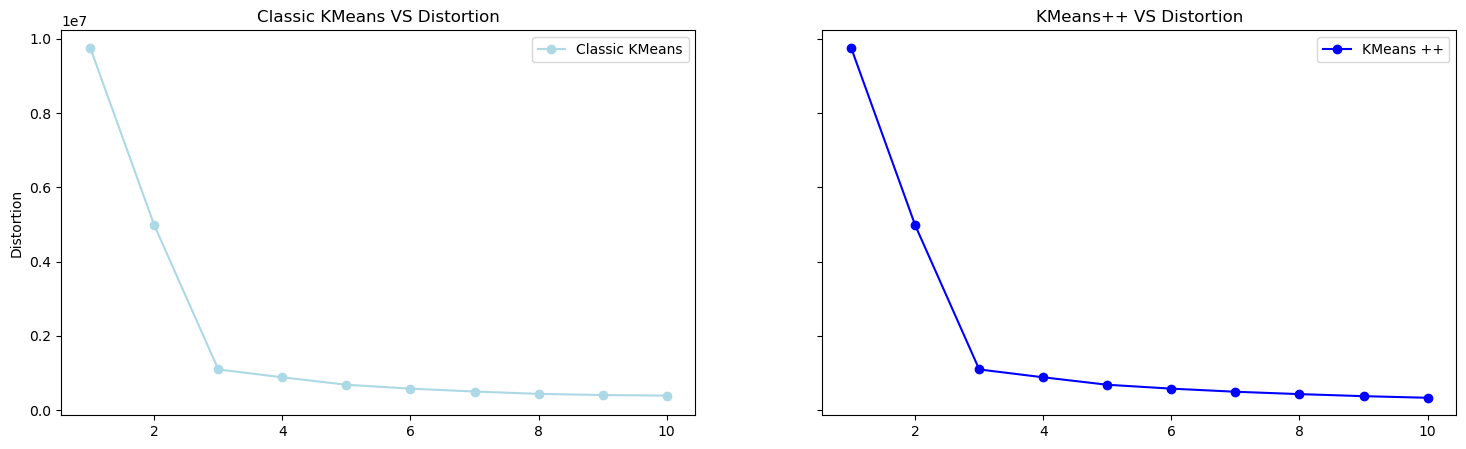

In [27]:
fig,ax = plt.subplots(1,2,figsize=(18,5),sharey=True)
ax[0].plot(list(range(1,11)),km_distortion,color='lightblue',marker='o',label='Classic KMeans')
ax[1].plot(list(range(1,11)),km_plus_distortion,color='blue',marker='o',label='KMeans ++')
ax[0].set_title('Classic KMeans VS Distortion')
ax[1].set_title('KMeans++ VS Distortion')
ax[0].set_ylabel('Distortion')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.show()

In [28]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score
km = KMeans(n_clusters=3,init='random',n_init=100,max_iter=300,tol=0.0001,random_state=11)
y_km = km.fit_predict(df)
silhouette_samples(X=df,labels=y_km,metric='euclidean')


array([0.99781963, 0.99781963, 0.99781963, ..., 0.99734314, 0.99749907,
       0.99739951])

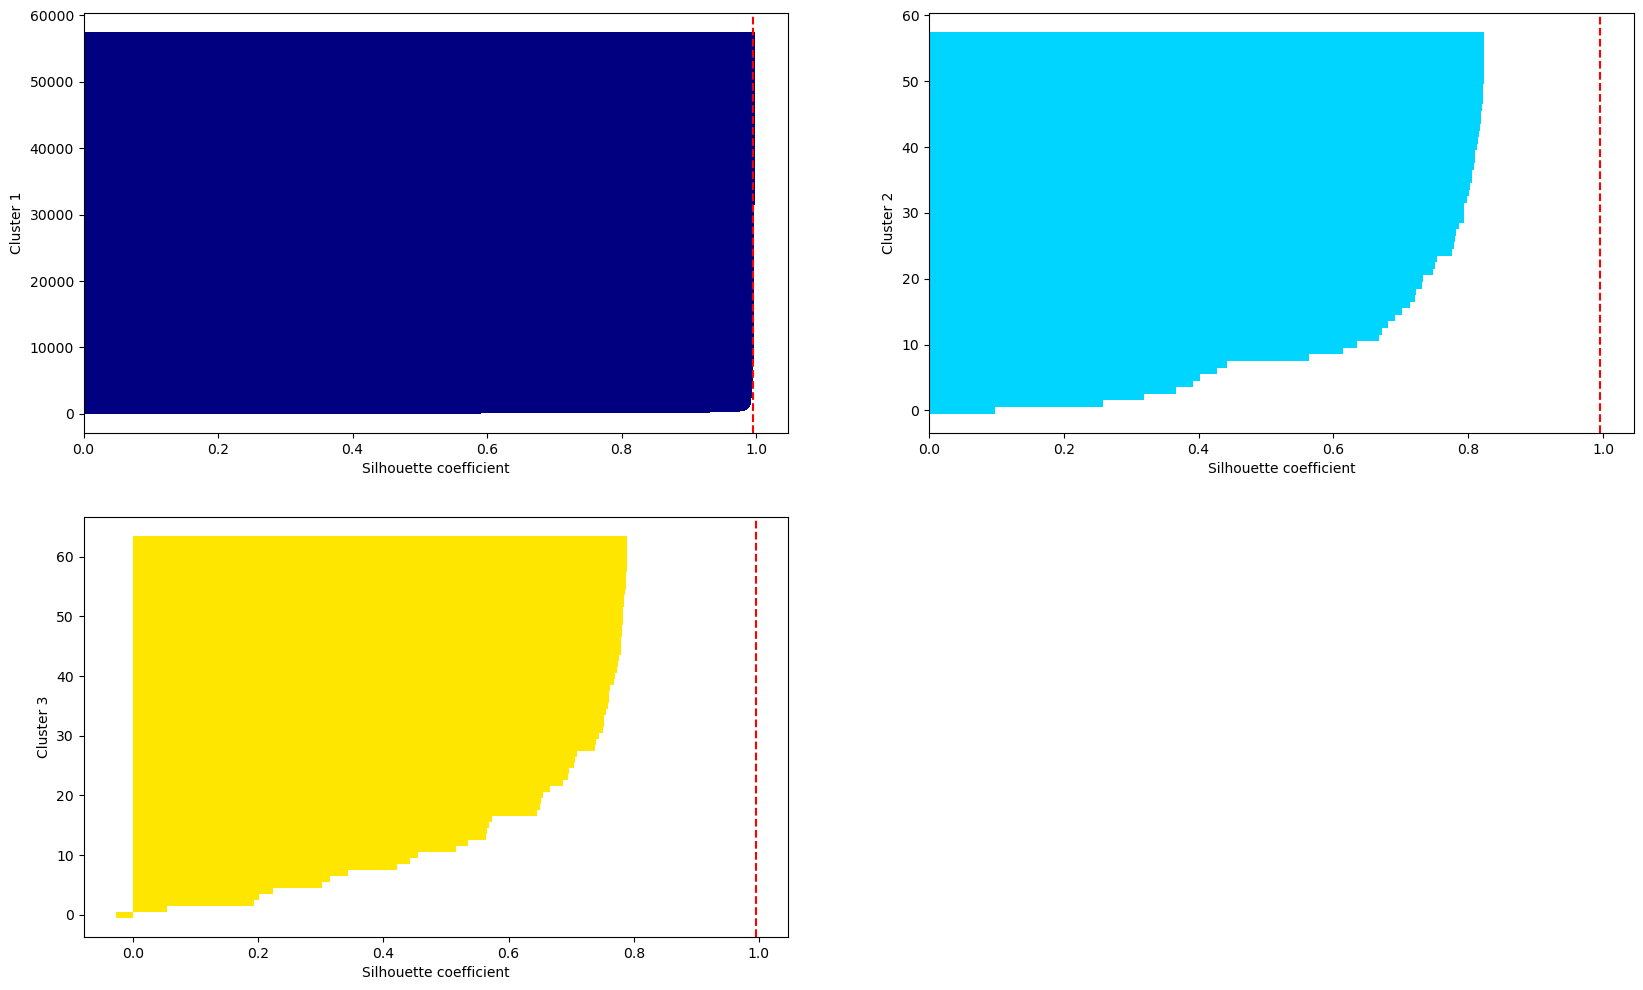

In [29]:
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_values = silhouette_samples(X=df,labels=y_km,metric='euclidean')
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(20,12))
ax[-1,-1].remove()
axes = ax.ravel()
for i, c in enumerate(cluster_label):
    y_ax_lower, y_ax_upper = 0, 0
    c_silhouette_vals = silhouette_values[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    axes[i].barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
            edgecolor='none',color=color,height=1.0)
    silhouette_avg = np.mean(silhouette_values)
    axes[i].axvline(silhouette_avg,color='red',linestyle='--')
    axes[i].set_ylabel(f'Cluster {c+1}')
    axes[i].set_xlabel('Silhouette coefficient')
    
plt.show()

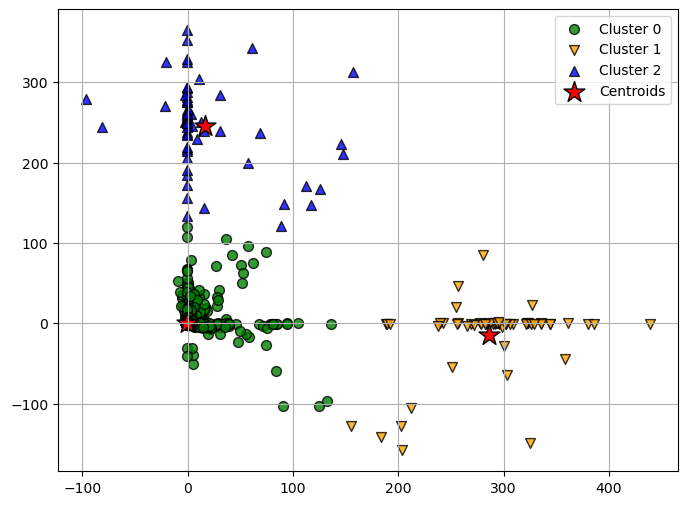

In [30]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

In [31]:
km_plus = KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=300,tol=0.0001,random_state=11)
y_km = km_plus.fit_predict(df)
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_values = silhouette_samples(X=df,labels=y_km,metric='euclidean')


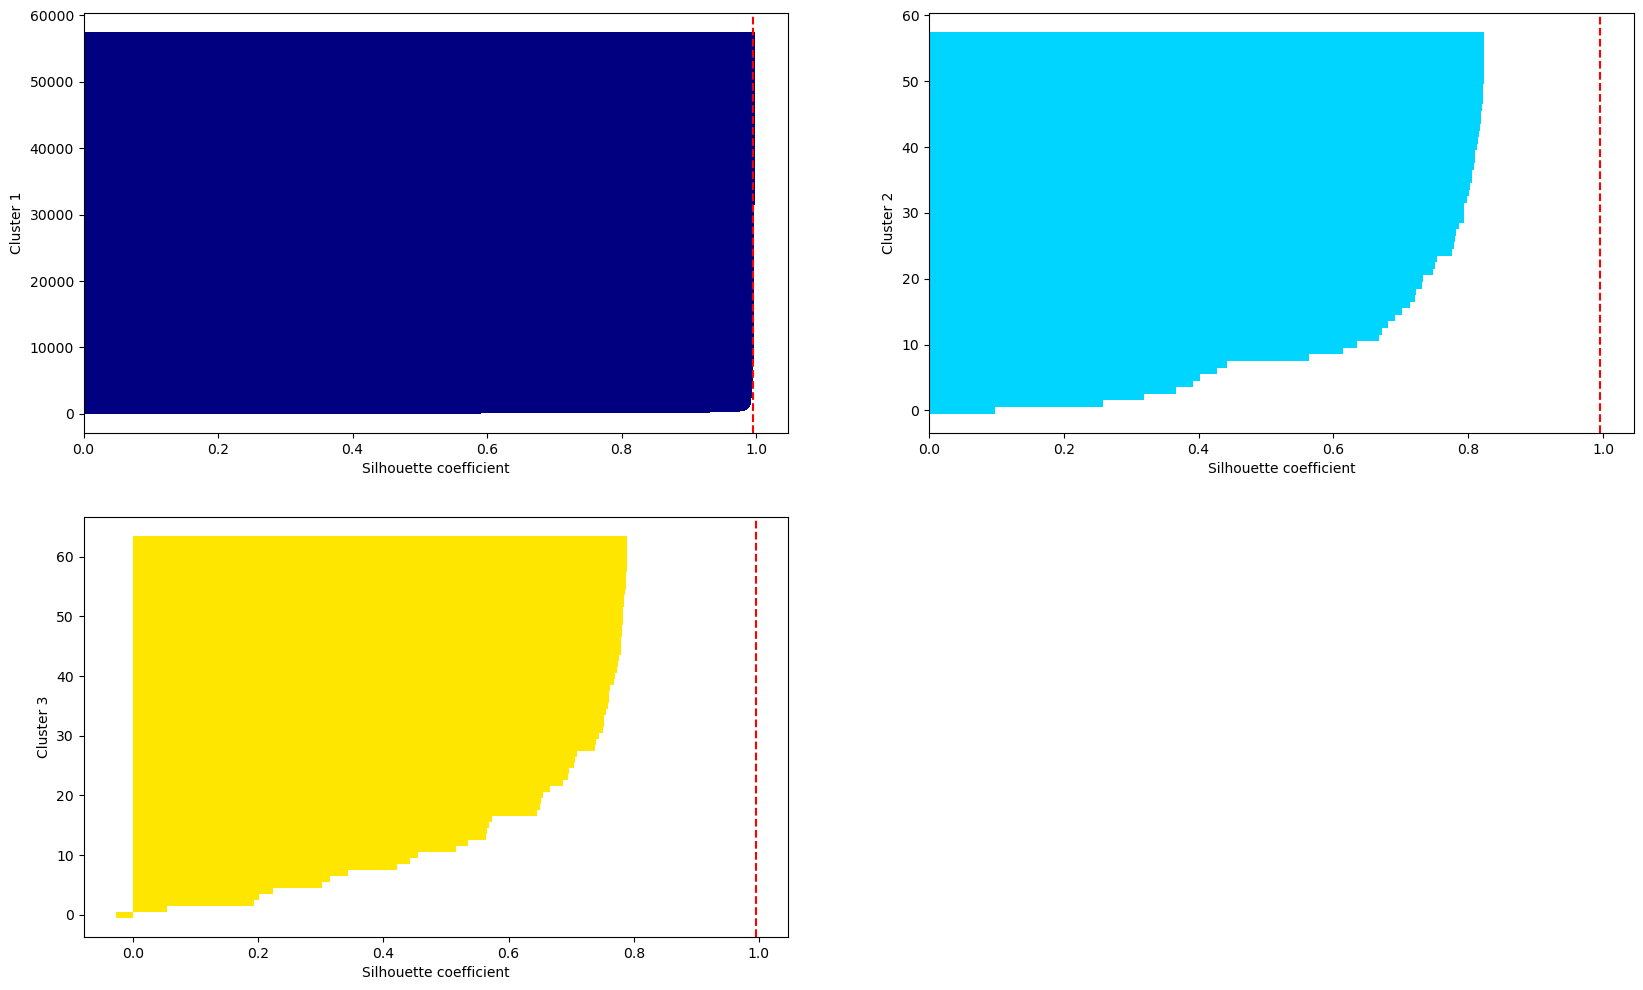

In [32]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(20,12))
ax[-1,-1].remove()
axes = ax.ravel()
for i, c in enumerate(cluster_label):
    y_ax_lower, y_ax_upper = 0, 0
    c_silhouette_vals = silhouette_values[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    axes[i].barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
            edgecolor='none',color=color,height=1.0)
    silhouette_avg = np.mean(silhouette_values)
    axes[i].axvline(silhouette_avg,color='red',linestyle='--')
    axes[i].set_ylabel(f'Cluster {c+1}')
    axes[i].set_xlabel('Silhouette coefficient')
    
plt.show()

In [3]:
X = df

k = 3
agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters = k).fit(X)
y_km = km_plus.fit_predict(df)
unique_labels = set(km_plus.labels_)
unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Complete linkage: %d' % agglo_complete.n_clusters)
plt.subplot(2, 2, 4)


NameError: name 'df' is not defined

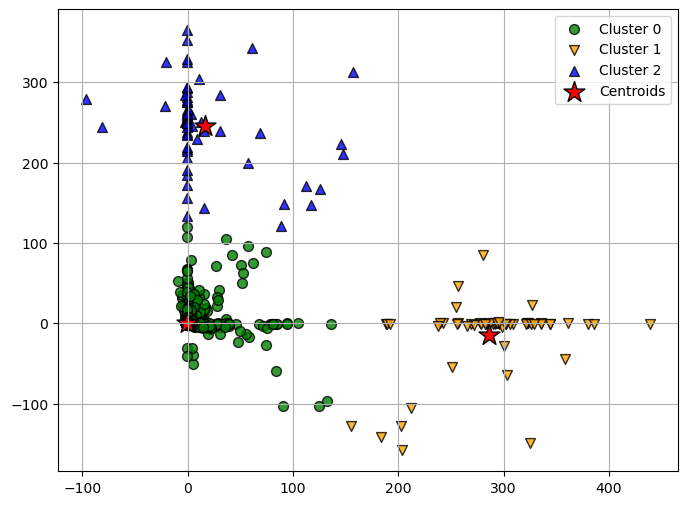

In [33]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km_plus.cluster_centers_[:,0],km_plus.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()